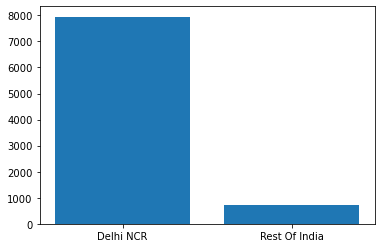

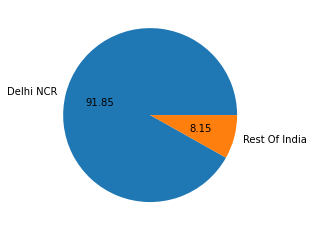

In [20]:
#1.1
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
data['ncr'] = ((data.City == "New Delhi")|(data.City == 'Ghaziabad')|(data.City == 'Noida')|(data.City == 'Gurgaon')|(data.City ==  'Faridabad'))
ncr =data.ncr.sum()
al = data.City.count()
other =al - ncr
names = ['Delhi NCR','Rest Of India']
plot = [ncr,other]
plt.bar(names,plot )
plt.show()
plt.pie(plot, labels = names, autopct =  '%.2f')
plt.show()

In [17]:
import requests as r
import json
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
data.City.loc[(data.City == "New Delhi")|(data.City == 'Ghaziabad')|(data.City == 'Noida')|(data.City == 'Gurgaon')|(data.City ==  'Faridabad')] = 'NCR'
Cuisine = data.Cuisines.str.split(',')
al =sum(Cuisine, [])
s = set()
for i in al:
    s.add(i.strip())
new =[]
loc = data.loc[(data.City == 'NCR')]
data['Cui'] = (data.loc[(data.City == 'NCR'), 'Cuisines'])
Cu = data.Cui.str.split(',')
for i in data.index:
    if data['Cui'][i] != 'NaN'or data['Cui'][i] != nan :
        new.append((data['Cui'][i]))
n = set([str(s) for s in new])
m = set()
for j in n:
    for i in j.split(','):
        m.add(i.strip())
actual = s-m
for i in actual:
    print(i, end = ' ')
print()
response  = r.get('https://developers.zomato.com/api/v2.1/cuisines', headers ={'user-key':'3f1dee3542afbb39e71ce019a23dc89b'}, params={'city_id':1})
res = response.json()
cuisines =[]
for i in res['cuisines']:
    cuisines.append(i['cuisine']['cuisine_name'].split(','))
q = set()
for j in cuisines:
    for i in j:
        q.add(i.strip())
for i in q:
    if i in actual:
        print(i, end = ' ')

Cajun BBQ Malwani German 
BBQ Malwani 

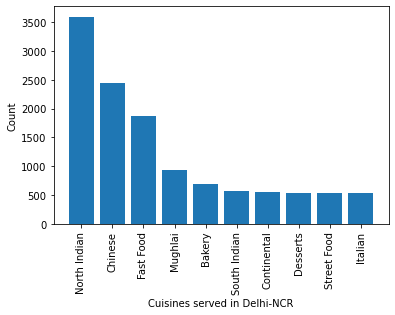

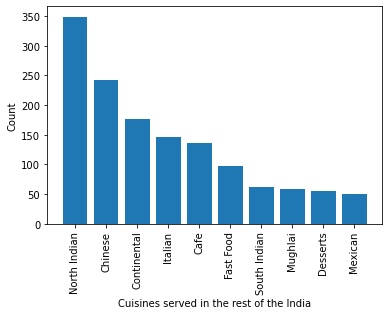

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
di = {}
data.City.loc[(data.City == "New Delhi")|(data.City == 'Ghaziabad')|(data.City == 'Noida')|(data.City == 'Gurgaon')|(data.City ==  'Faridabad')] = 'NCR'
loc = data.loc[(data.City == 'NCR')]
for i in data.index:
    if data['City'][i] == 'NCR':
        e = data['Cuisines'][i].split(',')
        for k in e:
            if k.strip() in di:
                di[k.strip()] = di[k.strip()] + 1
            elif k.strip() not in di:
                di[k.strip()] = 1
sorted_di = dict(sorted(di.items(), key=lambda item:item[1], reverse=True))
cuisine = [ i for i in sorted_di][:10]
count = [ sorted_di[i] for i in sorted_di][:10]    
plt.bar(cuisine,count)
plt.xticks(rotation=90)
plt.xlabel("Cuisines served in Delhi-NCR")
plt.ylabel("Count")
plt.show()
d = {}
for i in data.index:
    if data['City'][i] != 'NCR':
        e = data['Cuisines'][i].split(',')
        for k in e:
            if k.strip() in d:
                d[k.strip()] = d[k.strip()] + 1
            elif k.strip() not in d:
                d[k.strip()] = 1
sorted_d = dict(sorted(d.items(), key=lambda item:item[1], reverse=True))
cuisines = [ i for i in sorted_d][:10]
counts = [ sorted_d[i] for i in sorted_d][:10]    
plt.bar(cuisines,counts)
plt.xticks(rotation=90)
plt.xlabel("Cuisines served in the rest of the India")
plt.ylabel("Count")
plt.show()

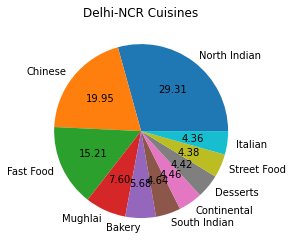

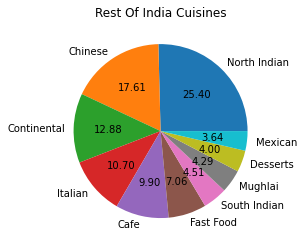

In [43]:
import requests as r
import json
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
data.City.loc[(data.City == "New Delhi")|(data.City == 'Ghaziabad')|(data.City == 'Noida')|(data.City == 'Gurgaon')|(data.City ==  'Faridabad')] = 'NCR'
d = {}
d1 =  {}
for i in data.index:
    if data['City'][i] == 'NCR':
        j = data['Cuisines'][i].split(',')
        for k in j:
            if k.strip() in d:
                d[k.strip()] = d[k.strip()] + 1
            elif k.strip() not in d:
                d[k.strip()] = 1
    else:
        j = data['Cuisines'][i].split(',')
        for k in j:
            if k.strip() in d1:
                d1[k.strip()] = d1[k.strip()] + 1
            elif k.strip() not in d1:
                d1[k.strip()] = 1
ncr = dict(sorted(d.items(),  key = lambda item:item[1], reverse = True))
restIndia = dict(sorted(d1.items(),  key = lambda item:item[1], reverse = True))
NCRcuisines = [ i for i in ncr][:10]
NCRcounts = [ ncr[i] for i in ncr][:10]  
RestIndiacuisines = [ i for i in restIndia][:10]
RestIndiacounts = [ restIndia[i] for i in restIndia][:10]
plt.pie(NCRcounts, labels = NCRcuisines, autopct = '%.2f')
plt.title('Delhi-NCR Cuisines')
plt.show()
plt.pie(RestIndiacounts, labels = RestIndiacuisines,autopct = '%.2f')
plt.title('Rest Of India Cuisines')
plt.show()

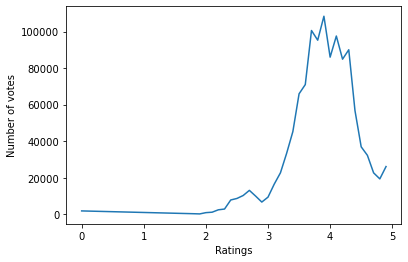

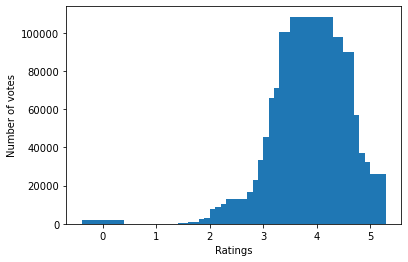

In [14]:
#2.1.1
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
d = {}
for i in data.index:
    k = data['Aggregate rating'][i]
    d[k] = d.get(k,0) + data['Votes'][i]
d =  dict(sorted(d.items(), key= lambda item:item[0], reverse = True))
rating = [i for i in d]
votes = [d[i] for i in d]
plt.plot(rating,votes)
plt.xlabel('Ratings')
plt.ylabel('Number of votes')
plt.show()
plt.bar(rating,votes)
plt.xlabel('Ratings')
plt.ylabel('Number of votes')
plt.show()

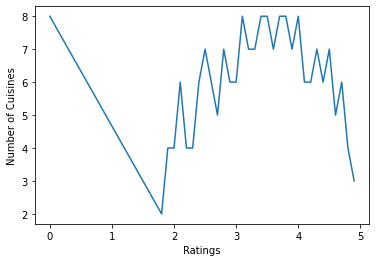

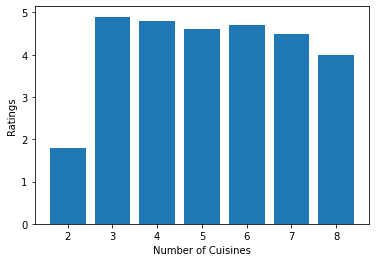

In [18]:
#2.1.2
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
d = {}
for i in data.index:
    k = data['Aggregate rating'][i]
    m = data['Cuisines'][i].split(', ')
    q =len(m)
    d[k] = max(d.get(k,0), q)
d =  dict(sorted(d.items(), key= lambda item:item[0], reverse = True))
rating = [i for i in d]
cuisines = [d[i] for i in d]
plt.plot(rating,cuisines)
plt.xlabel('Ratings')
plt.ylabel('Number of Cuisines')
plt.show()
plt.bar(cuisines,rating)
plt.ylabel('Ratings')
plt.xlabel('Number of Cuisines')
plt.show()

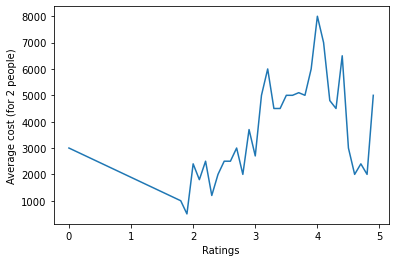

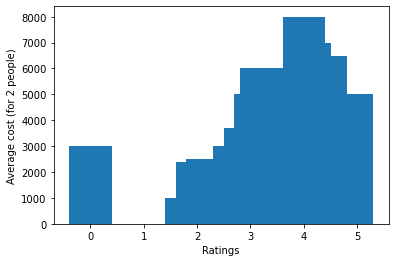

In [19]:
#2.1.3
#2.1.2
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]

d = {}
for i in data.index:
    k = data['Aggregate rating'][i]
    m = data['Average Cost for two'][i]
    d[k] = max(d.get(k,0), m)
d =  dict(sorted(d.items(), key= lambda item:item[0], reverse = True))
rating = [i for i in d]
price = [d[i] for i in d]
plt.plot(rating,price)
plt.xlabel('Ratings')
plt.ylabel('Average cost (for 2 people)')
plt.show()
plt.bar(rating,price)
plt.xlabel('Ratings')
plt.ylabel('Average cost (for 2 people)')
plt.show()

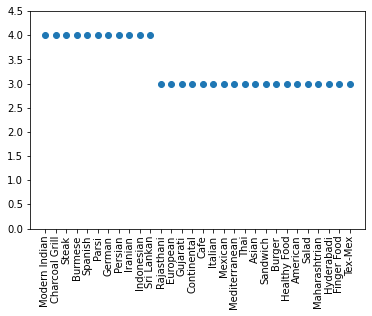

['Modern Indian', 'Charcoal Grill', 'Steak', 'Burmese', 'Spanish', 'Parsi', 'German', 'Persian', 'Iranian', 'Indonesian', 'Sri Lankan', 'Rajasthani', 'European', 'Gujarati', 'Continental', 'Cafe', 'Italian', 'Mexican', 'Mediterranean', 'Thai', 'Asian', 'Sandwich', 'Burger', 'Healthy Food', 'American', 'Salad', 'Maharashtrian', 'Hyderabadi', 'Finger Food', 'Tex-Mex']


In [30]:
#2.1.4
import requests as r
import json
import pandas as pd
import statistics
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
d = {}
for i in data.index:
    k = data['Cuisines'][i].split(', ')
    s = data['Aggregate rating'][i]
    for j in range(len(k)):
        m = k[j]
        if m not in d:
            d[m] = [s, 1]
        else:
            d[m][0] = d[m][0]+s
            d[m][1] = d[m][1]+1
for i in d:
    d[i] = [d[i][0]//d[i][1]]
d = dict(sorted(d.items(), key = lambda item:item[1], reverse = True))
rating =[d[i] for i in d][:30]
cuisines = [i for i in d][:30]
plt.scatter(cuisines,rating)
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,4.5])
plt.show()
print(cuisines)

Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


<ipython-input-8-4ab12046e7d5>:17: RuntimeWarning: invalid value encountered in double_scalars
  d[i][0] = round(d[i][0]/d[i][1],2)


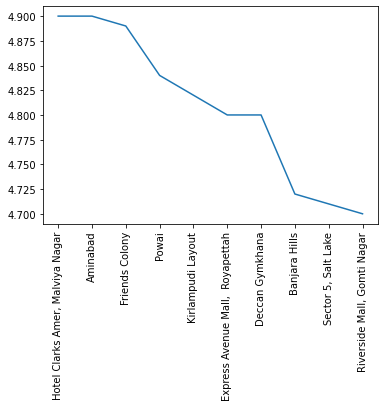

In [8]:
#2.2.1
import pandas as pd
from math import isnan
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
data['W1'] = data['Aggregate rating'] * data['Votes']
d = {}
for i in data.index:
    k = data['Locality'][i]
    if k not in d:
        d[k] = [data['W1'][i], data['Votes'][i]]
    else:
        d[k][0] = d[k][0] + data['W1'][i]
        d[k][1] =  d[k][1] + data['Votes'][i]
for i in d:
        d[i][0] = round(d[i][0]/d[i][1],2)
d = {k: d[k][0] for k in d if not isnan(d[k][0])}
d = dict(sorted(d.items(),  key = lambda item:item[1], reverse = True))
names = [i for i in d][:10]
rating = [d[i] for i in d][:10]
for i in range(10):
    print(names[i], rating[i])
plt.plot(names,rating)
plt.xticks(rotation=90)
plt.show()

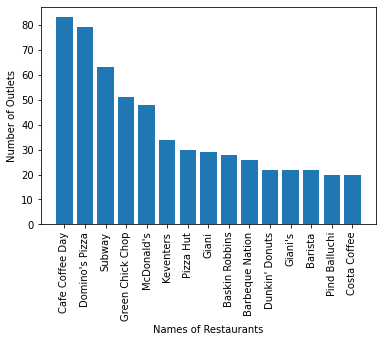

In [44]:
#3.1
import requests as r
import json
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
d = {}
for i in data.index:
    k = data['Restaurant Name'][i]
    if k not in d:
        d[k]= 1
        
    else:
        d[k] += 1
di = dict(sorted( d.items(),  key = lambda item:item[1], reverse = True))
names = [i for i in di][:15]
outlets = [di[i] for i in di][:15]
plt.bar(names, outlets)
plt.xticks(rotation=90)
plt.xlabel("Names of Restaurants")
plt.ylabel("Number of Outlets")
plt.show()

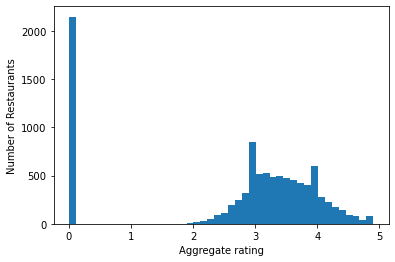

In [47]:
#3.2
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[(data['Rating text']!='Not Rated')|(data['Rating text']!='Not rated')|(data['Rating text']!='not rated')|(data['Rating text']!='')]
data.dropna(subset = ['Aggregate rating'],inplace = True)
ratings = data['Aggregate rating']
plt.hist(ratings,bins = "auto",  align='mid')
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.show()

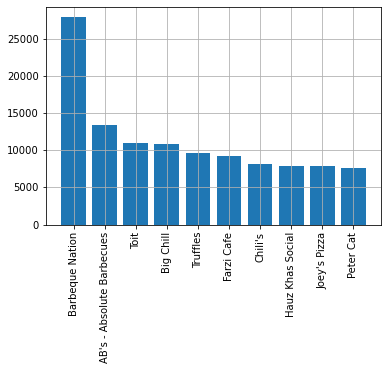

In [48]:
#3.3
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
d = {}
for i in data.index:
    k = data['Restaurant Name'][i]
    d[k] =  d.get(k,0) + data['Votes'][i]
dicti = dict(sorted(d.items(), key = lambda item:item[1], reverse = True))
names = [i for i in dicti][:10]
votes =  [dicti[i] for i in dicti][:10]
plt.bar(names,votes)
plt.grid()
plt.xticks(rotation=90)
plt.show()

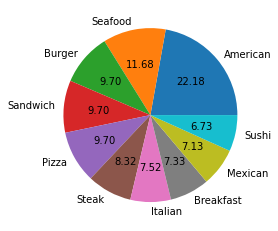

In [50]:
#3.4
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==216]
data.dropna(subset = ['Cuisines'], inplace = True)
d = {}
for i in data.index:
    k = data['Cuisines'][i].split(', ')
    for j in k[:]:
        d[j] = d.get(j,0) + 1
di = dict(sorted(d.items(), key = lambda item:item[1], reverse = True))
names = [i for i in di][:10]
number = [di[i] for i in di][:10]
plt.pie(number,  labels = names, autopct = '%.2f')
plt.show()

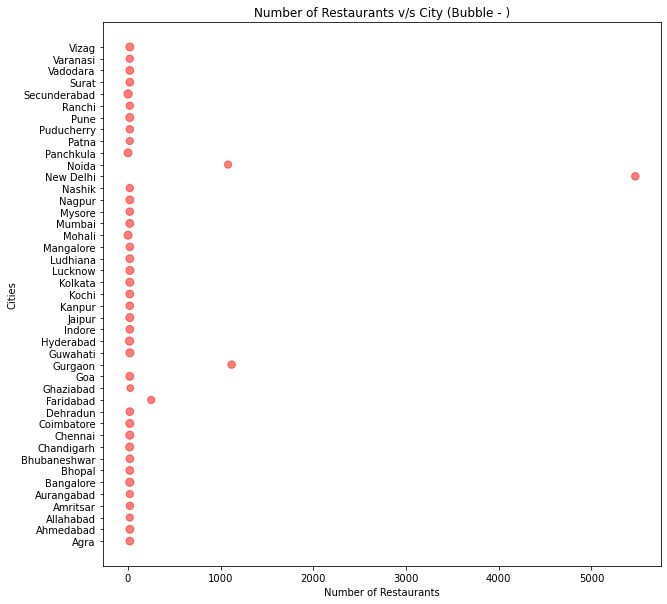

In [6]:
#3.5
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('zomato.csv',encoding = 'ISO-8859-1')
data = data[data['Country Code']==1]
data['W1'] = data['Aggregate rating'] * data['Votes']
d = {}
for i in data.index:
    k = data['City'][i]
    if k not in d:
        d[k] = [data['W1'][i], data['Votes'][i], 1]
    else:
        d[k][0] = d[k][0] + data['W1'][i]
        d[k][1] =  d[k][1] + data['Votes'][i]
        d[k][2] =  d[k][2] + 1
Weighted = [(d[i][0]/d[i][1])*15 for i in d]
rest = [d[i][2] for  i in d]
names = [i for i in d]
plt.figure(figsize=(10, 10))
plt.scatter(rest, names,Weighted,alpha = 0.5, c = 'red')
plt.title('Number of Restaurants v/s City (Bubble - )')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cities')
plt.show()